In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)

no1 = data.groupby(['MaritalDesc', 'Sex'])['Salary'].agg(['min', 'median', 'max', 'mean'])
no1.columns = ['min_salary', 'median_salary', 'max_salary', 'average_salary']
no1

min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [ ]:
no2 = data.groupby('TermReason').agg(total_termination = ('TermReason', 'count'))
no2.sort_values(by = 'total_termination', ascending = False).head()

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [ ]:
no3 = data[data['PerformanceScore'] == 'Exceeds']
no3.groupby('RecruitmentSource').agg(total_recruit = ('PerformanceScore', 'count')).sort_values(by = 'total_recruit', ascending = False)

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
data.groupby('Department').agg({'ManagerName': 'nunique'})

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
data.groupby('Sex')['Termd'].value_counts(normalize=True)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64

# Create an EDA and Data Visualization Question

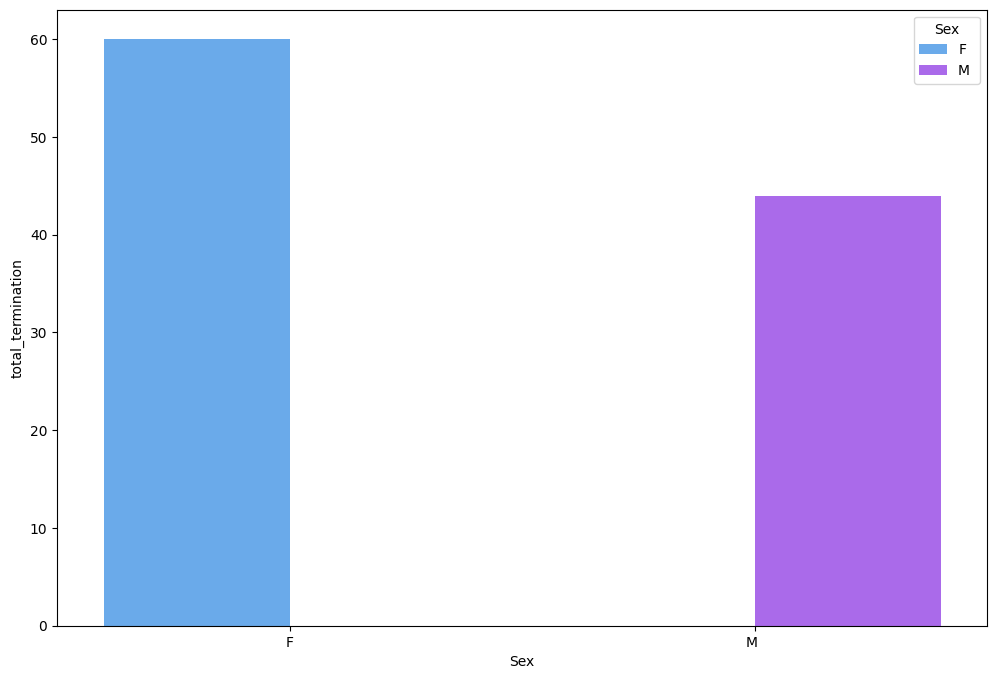

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh (contoh dihapus)*

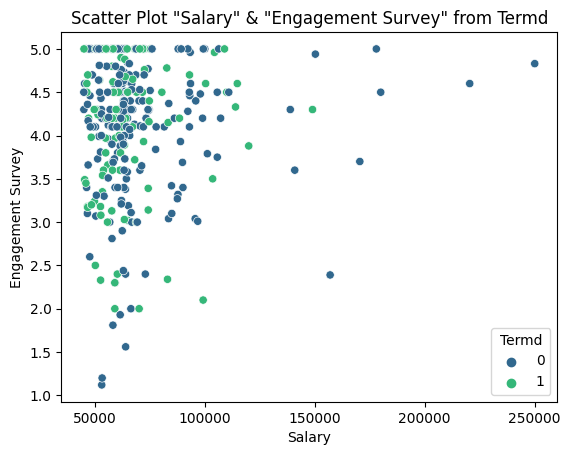

In [ ]:
sns.scatterplot(x='Salary', y='EngagementSurvey', hue='Termd', data=data, palette='viridis')

plt.title('Scatter Plot "Salary" & "Engagement Survey" from Termd')
plt.xlabel('Salary')
plt.ylabel('Engagement Survey')

plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh (contoh dihapus)*

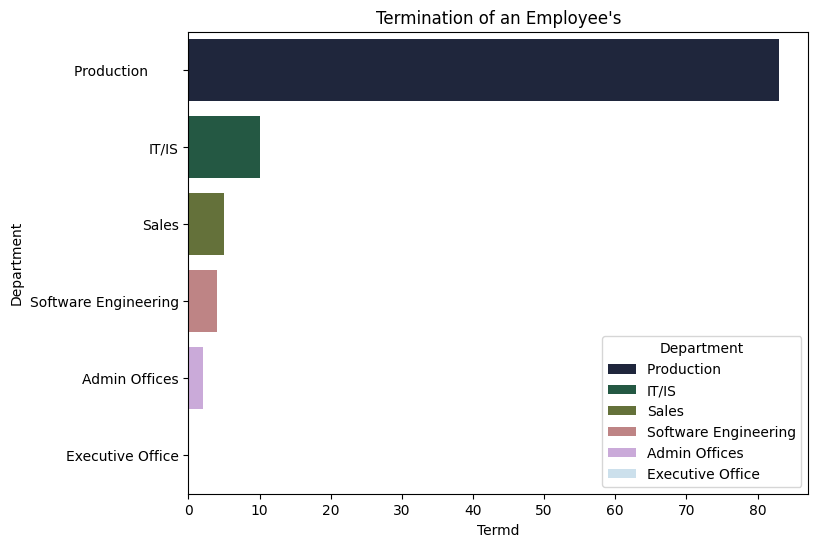

In [ ]:
bar = data.groupby(by=['Department']).agg({'Termd':'sum'}).reset_index()

plt.figure(figsize=(8, 6))
plt.title('Termination of an Employee\'s')

sns.barplot(data=bar.sort_values(by='Termd', ascending=False), y='Department', x='Termd', hue='Department', palette='cubehelix', dodge=False)

plt.show()

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh (contoh dihapus)*

<function matplotlib.pyplot.show(close=None, block=None)>

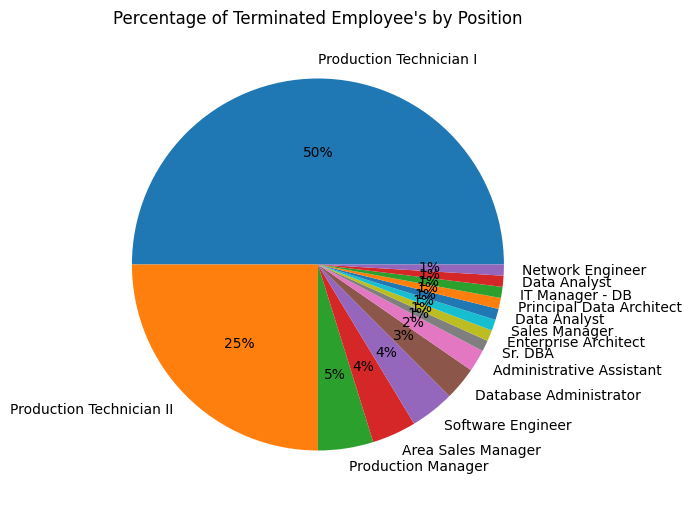

In [ ]:
pie = data[data['Termd'] == 1]['Position'].value_counts().sort_values(ascending=False)

label = pie.index.to_numpy()
value = pie.to_numpy()
plt.figure(figsize=(6, 12))
plt.pie(x=value, labels=label, autopct='%1.0f%%')
plt.title('Percentage of Terminated Employee\'s by Position')
plt.show

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

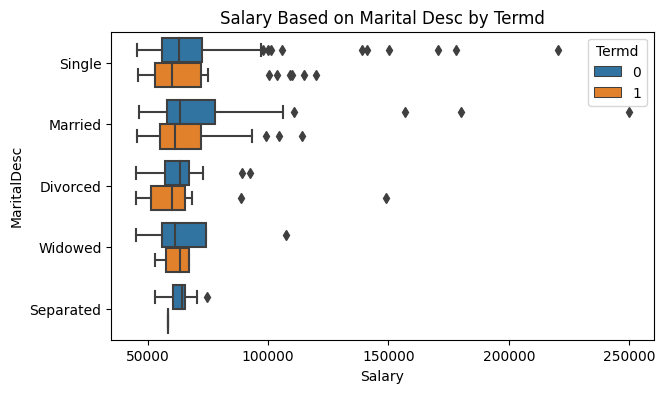

In [ ]:
plt.figure(figsize=(7,4))

sns.boxplot(y='MaritalDesc', x='Salary', data=data, hue='Termd')

plt.title('Salary Based on Marital Desc by Termd')

plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


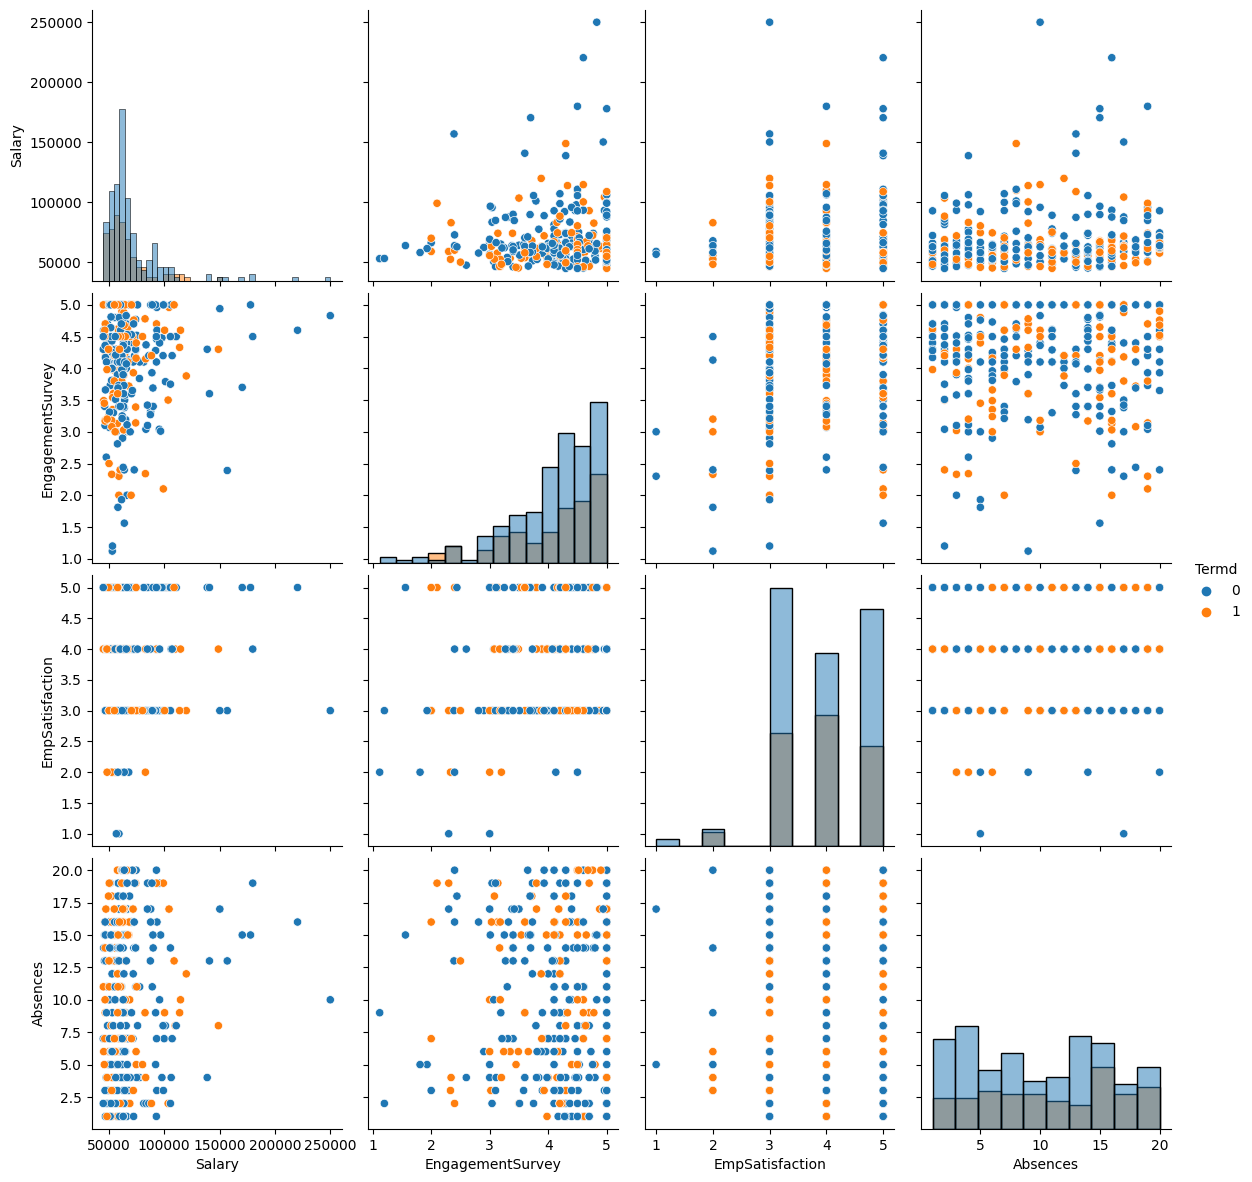

In [ ]:
#codde here
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [ ]:
import copy
dataml = copy.deepcopy(data)

In [ ]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)

dataml['DOB_date'] = pd.to_datetime(dataml['DOB'])
dataml['Year'] = dataml['DOB_date'].dt.year
dataml['Age'] = 2022 - dataml['DOB_date'].dt.year

dataml[['DOB', 'DOB_date', 'Age']]

,DOB,DOB_date,Age
0,07/10/83,1983-07-10,39
1,05/05/75,1975-05-05,47
2,09/19/88,1988-09-19,34
3,09/27/88,1988-09-27,34
4,09/08/89,1989-09-08,33
...,...,...,...
306,05/11/85,1985-05-11,37
307,05/04/82,1982-05-04,40
308,08/30/79,1979-08-30,43
309,02/24/79,1979-02-24,43


In [ ]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataml['Salary_minmax'] = scaler.fit_transform(dataml[['Salary']])

dataml[['Salary', 'Salary_minmax']]

,Salary,Salary_minmax
0,62506,0.085190
1,104437,0.289777
2,64955,0.097139
3,64991,0.097315
4,50825,0.028197
...,...,...
306,65893,0.101716
307,48513,0.016916
308,220450,0.855821
309,89292,0.215883


In [ ]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point

In [ ]:
#Setelah diubah category

In [ ]:
for obj in dataml.columns:
  if str(dataml[obj].dtype) == 'object':
    dataml[obj] = dataml[obj].astype('category')

dataml.dtypes

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point
dataml['RecruitmentSource'] = label_encoder.fit_transform(dataml['RecruitmentSource'])

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
dataml['PerformanceScore'] = label_encoder.fit_transform(dataml['PerformanceScore'])

dataml.dtypes

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

# Dependent Variable (target)
y = dataml['Termd']

# Independent Variables (features)
X = dataml[['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID', 'PositionID', 'Age', 'RecruitmentSource', 'PerformanceScore', 'Salary_minmax', 'Absences', 'SpecialProjectsCount', 'EmpSatisfaction', 'EngagementSurvey']]

X.head()

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,Age,RecruitmentSource,PerformanceScore,Salary_minmax,Absences,SpecialProjectsCount,EmpSatisfaction,EngagementSurvey
0,0,0,1,5,4,19,39,5,0,0.085190,1,0,5,4.60
1,1,1,1,3,3,27,47,4,1,0.289777,17,6,3,4.96
2,1,1,0,5,3,20,34,5,1,0.097139,3,0,3,3.02
3,1,1,0,5,3,19,34,4,1,0.097315,15,0,5,4.84
4,0,2,0,5,3,19,33,3,1,0.028197,2,0,4,5.00


In [ ]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Termd, dtype: int64

In [ ]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train set shape (X_train, y_train): ', X_train.shape, y_train.shape)
print('Test set shape (X_test, y_test): ', X_test.shape, y_test.shape)

Train set shape (X_train, y_train):  (248, 14) (248,)
Test set shape (X_test, y_test):  (63, 14) (63,)


In [ ]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create a binary target variable
dataml['Termd_binary'] = (dataml['Termd'] == 1).astype(int)

# Define the dependent variable (target)
y = dataml['Termd_binary']

# Define the independent variables (features)
X = dataml[['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID', 'PositionID', 'Age', 'RecruitmentSource', 'PerformanceScore', 'Salary_minmax', 'Absences', 'SpecialProjectsCount', 'EmpSatisfaction', 'EngagementSurvey']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation results
print("Accuracy : {:.2f}%".format(accuracy * 100))
print("Precision : {:.2f}%".format(precision * 100))
print("Recall : {:.2f}%".format(recall * 100))

Accuracy : 61.90%
Precision : 40.00%
Recall : 18.18%


# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

19. Based on the provided data, there does appear to be a relationship between who a person works for (their manager) and their performance score. Each manager has employees with varying performance scores, including "Exceeds," "Fully Meets," "Needs Improvement," and "PIP."

    For example, let's look at two managers, Alex Sweetwater and Amy Dunn:

  *   Alex Sweetwater has 2 employees with an "Exceeds" performance score, 6 with "Fully Meets," 1 with "Needs Improvement," and 0 with "PIP."
  *   Amy Dunn has 3 employees with an "Exceeds" performance score, 15 with "Fully Meets," 1 with "Needs Improvement," and 2 with "PIP."

    This pattern continues for other managers as well. Some have more employees with "Exceeds" scores, while others have more employees with "Fully Meets" or other performance scores. This suggests that the manager may influence or play a role in employee performance scores.

PerformanceScore    Exceeds  Fully Meets  Needs Improvement  PIP
ManagerName                                                     
Alex Sweetwater           2            6                  1    0
Amy Dunn                  3           15                  1    2
Board of Directors        0            2                  0    0
Brandon R. LeBlanc        0            7                  0    0
Brannon Miller            7           10                  1    4
Brian Champaigne          0            8                  0    0
David Stanley             1           19                  1    0
Debra Houlihan            0            2                  1    0
Elijiah Gray              2           18                  2    0
Eric Dougall              1            3                  0    0
Janet King                4           13                  2    0
Jennifer Zamora           2            4                  1    0
John Smith                0           12                  0    2
Kelley Spirea            

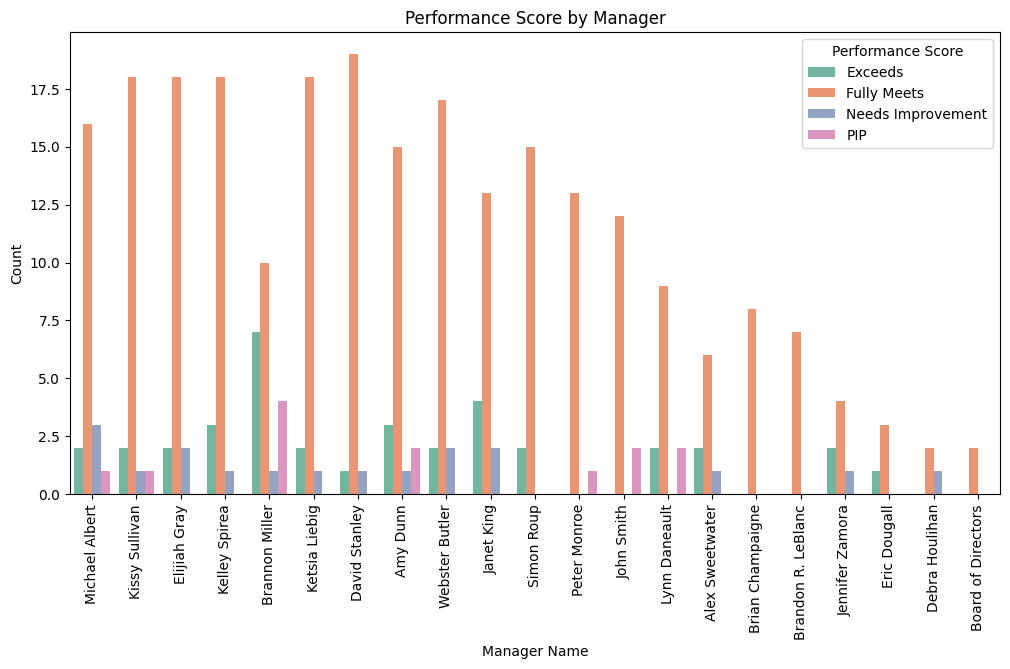

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='ManagerName', hue='PerformanceScore', palette='Set2', order=data['ManagerName'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Performance Score by Manager")
plt.xlabel("Manager Name")
plt.ylabel("Count")
plt.legend(title="Performance Score")

# Calculate and print the total performance score counts for each manager
total_score_by_manager = data.groupby(['ManagerName', 'PerformanceScore'])['Employee_Name'].count().reset_index()
total_score_by_manager = total_score_by_manager.pivot(index='ManagerName', columns='PerformanceScore', values='Employee_Name').fillna(0)

# Convert the result to integer
total_score_by_manager = total_score_by_manager.astype(int)

# Print the total performance score counts for each manager
print(total_score_by_manager)

# Show the plot
plt.show()

20. Based on the provided data, if you want to ensure a low ratio of termination, the best recruiting sources are as follows:

  *   On-line Web application: This source has an equal number of employees who are still working and those who have been terminated, resulting in a 1:1 ratio.
  *   Other: Similar to the "On-line Web application" source, "Other" has a 2:1 ratio of employees who are still working to those who have been terminated.
  *   Website: The "Website" source has the highest number of employees still working (13) with only 1 termination, resulting in the lowest termination ratio among the sources.

    These three recruiting sources have the lowest termination ratios in the given dataset, making them the best choices for ensuring a low ratio of termination based on the available data.

        Recruitment Source  Still Working  Terminated
0  On-line Web application              1           1
1                    Other              2           1
2                  Website             13           1
3        Employee Referral             31           5
4            CareerBuilder             23          11
5       Diversity Job Fair             29          16
6                 LinkedIn             76          18
7                   Indeed             87          21
8            Google Search             49          30


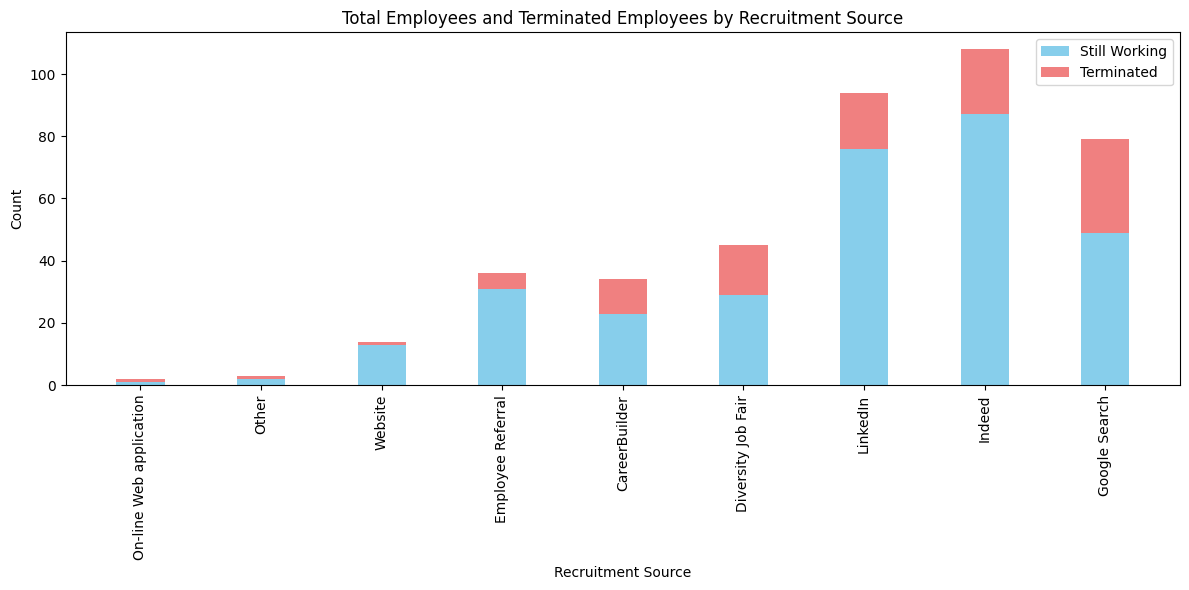

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to include only terminated employees
terminated_data = data[data["Termd"] == 1]

# Calculate the total number of employees and terminated employees for each recruiting source
recruitment_source_counts = data["RecruitmentSource"].value_counts()
terminated_source_counts = terminated_data["RecruitmentSource"].value_counts()

# Sort the sources by the number of terminated employees (ascending order)
sorted_sources = terminated_source_counts.sort_values().index

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    "Recruitment Source": sorted_sources,
    "Still Working": recruitment_source_counts[sorted_sources].values,
    "Terminated": terminated_source_counts[sorted_sources].values
})

# Create a bar chart to visualize the total employees and terminated employees for each source
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(len(sorted_sources))

plt.bar(index, results_df["Still Working"], bar_width, label="Still Working", color="skyblue")
plt.bar(index, results_df["Terminated"], bar_width, label="Terminated", color="lightcoral", bottom=results_df["Still Working"])

plt.title("Total Employees and Terminated Employees by Recruitment Source")
plt.xlabel("Recruitment Source")
plt.ylabel("Count")
plt.xticks(index, sorted_sources, rotation=90)
plt.legend()

# Print the results DataFrame
print(results_df)

# Show the bar chart
plt.tight_layout()
plt.show()